# 1. AutoEncoder MNIST

Reference: https://www.youtube.com/watch?v=CCipk_ZH49I

## Input libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TensorFlow
import tensorflow as tf

2023-08-25 13:44:28.980523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 13:44:29.534819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Keras
from keras.datasets import mnist

from keras.models import Model
from keras.layers import Input, Dense

In [4]:
# Other Libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

(60000, 28, 28)

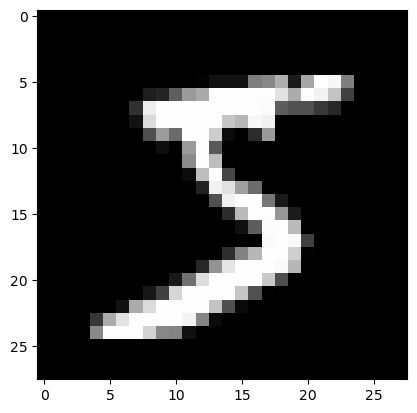

In [6]:
# Visualize one image
plt.imshow(X_train[0], cmap='gray')

### Preprocess the data

In [7]:
X_train[0].shape[0]

28

In [8]:
X_train.shape[0]

60000

In [9]:
28*28

784

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

x_train contains 60000 images of 28x28 pixels each. Now, we need to flatten the images into vectors of 28x28 = 784 pixels each. The result is that x_train will be a matrix of 6000 x 784 (28*28). We will repeat the same for x_test 10000 x 784 (28*28).

In [12]:
# Convert 2D image into 1D vector
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0]*X_train[0].shape[1])
X_train.shape

(60000, 784)

In [13]:
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[0]*X_test[0].shape[1])
X_test.shape

(10000, 784)

Check the amplitude of the values in the x_train and x_test matrices. The values are between 0 and 255. We will normalize the values between 0 and 1 by dividing by 255.

In [14]:
X_train.max()

255

Normalize the data dividing the dataset by the max number, in this case 255.

In [15]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Check if the values are between 0 and 1.

In [16]:
X_train.max()

1.0

## Model

In [ ]:
# Define Layers
input_layer = Input(shape=(X_train.shape[1])) # 784 (28*28)
latent_space = Dense(32, activation='relu', name = 'latent_space')(input_layer) # 32
output_layer = Dense(X_train.shape[1], activation='sigmoid', name = 'output_layer')(latent_space) # 784 (28*28)

: 

In [ ]:
# Connect Layers intop the Model
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 latent_space (Dense)        (None, 32)                25120     
                                                                 
 output_layer (Dense)        (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make a independent reference to the encoder part of the model
encoder = Model(input_layer, latent_space)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 latent_space (Dense)        (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make a independent reference to the decoder part of the model
encoded_layer = Input(shape=(32,), name='encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))

In [ ]:
# Compile the model using MSE loss and Adam Optimizer
autoencoder.compile(loss='mse', optimizer='adam')

In [ ]:
# Fit training data to the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=128)

Epoch 1/50


2023-08-25 11:31:33.766023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-25 11:31:33.784320: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x45617a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-25 11:31:33.784348: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-08-25 11:31:33.790435: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-25 11:31:33.807999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-25 11:31:33.927797: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 2ms/step - loss: 0.0539
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0258
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0184
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0148
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0128
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0109
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0106
Epoch 11/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 12/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 13/50
469/469 [===============

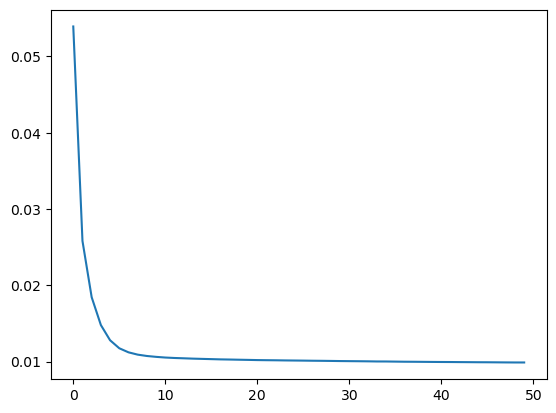

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'])

In [ ]:
# Plot the test loss
plt.plot(history.history['val_loss'])

In [ ]:
# Reconstruction 
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 0s 752us/step


(10000, 32)

In [ ]:
# Reconstruct Output
output_data = decoder.predict(encoded_data,  batch_size=512)
output_data.shape

 1/20 [>.............................] - ETA: 0s

20/20 [==============================] - 0s 473us/step


(10000, 784)

In [ ]:
# Re-shape the test data
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test.shape

(10000, 28, 28)

In [ ]:
# Re-shape the output data into a 28 x 28 pixel image
output_data = output_data.reshape(output_data.shape[0], 28, 28)
output_data.shape

(10000, 28, 28)

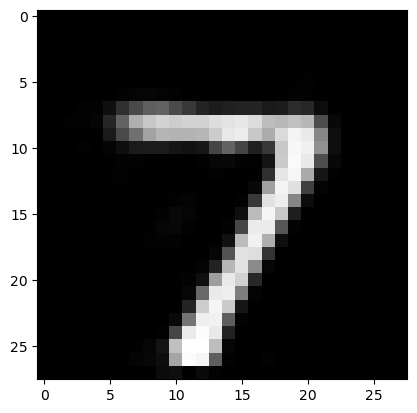

In [ ]:
plt.imshow(output_data[0], cmap='gray')

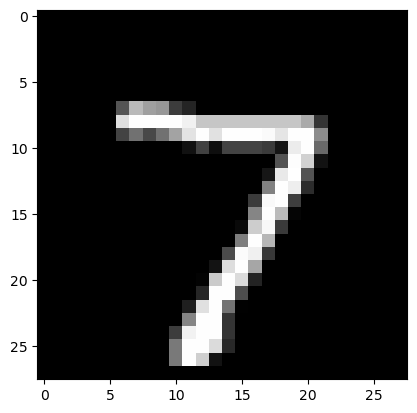

In [ ]:
# Show test image
plt.imshow(X_test[0], cmap='gray')

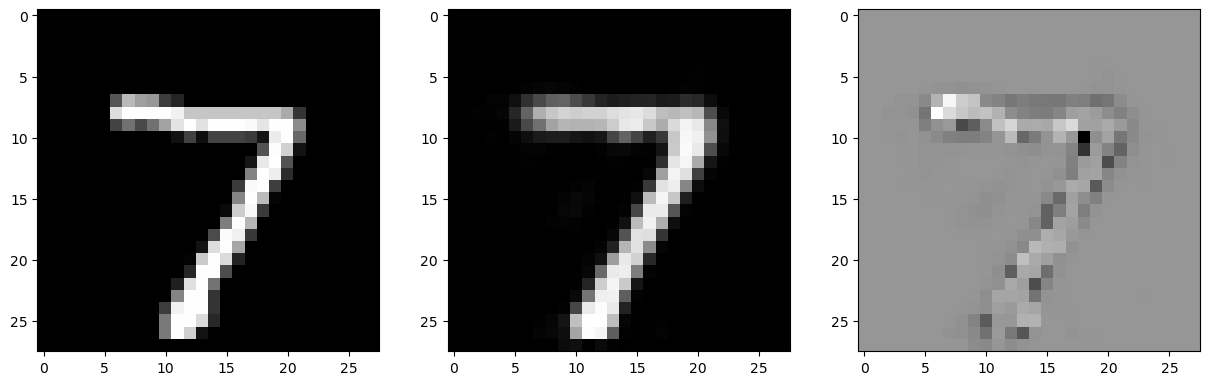

In [ ]:
# Create a 1 row 3 column grid plot, where the 1st image is the test, 2nd is the output and 3rd is the difference between the two
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(X_test[0], cmap='gray')
axes[1].imshow(output_data[0], cmap='gray')
axes[2].imshow(X_test[0] - output_data[0], cmap='gray')
plt.show()